# PART A:

## Task 1:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(22)
# Define the dataset
X = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Define the initial seeds (centers)
centers = np.array([[2, 5], [8, 4], [4, 9]])

# Define the number of clusters and epochs
k = 3
epochs = 10

# Initialize the clusters and the centroids
clusters = [[] for _ in range(k)]
centroids = centers.copy()

# Define a function to assign examples to clusters
def assign_clusters(X, centroids):
    clusters = [[] for _ in range(k)]
    for example in X:
        distances = [np.linalg.norm(example - centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(example)
    return clusters

# Define a function to update the centroids
def update_centroids(clusters):
    centroids = np.zeros((k, X.shape[1]))
    for i, cluster in enumerate(clusters):
        if len(cluster) > 0:
            centroids[i] = np.mean(cluster, axis=0)
        else:
            centroids[i] = np.random.uniform(0, 10, size=X.shape[1])
    return centroids

# Run the k-means algorithm for one epoch
for epoch in range(1):
    clusters = assign_clusters(X, centroids)
    centroids = update_centroids(clusters)











In [4]:
# Q1. New clusters
# Print the new clusters and centroids
print('New clusters:')
for i, cluster in enumerate(clusters):
    print(f'Cluster {i+1}: {cluster}')
# Assign labels to the examples
labels = np.zeros(X.shape[0], dtype=int)
for i, cluster in enumerate(clusters):
    for example in cluster:
        labels[np.where((X == example).all(axis=1))] = i

# Print the labels
print('Labels:')
print(labels)

New clusters:
Cluster 1: [array([2, 5]), array([1, 2])]
Cluster 2: [array([8, 4]), array([7, 5]), array([6, 4])]
Cluster 3: [array([ 2, 10]), array([5, 8]), array([4, 9])]
Labels:
[2 0 1 2 1 1 0 2]


In [5]:

# Q2. Centers of new clusters
print('New centroids:')
print(centroids)

New centroids:
[[1.5        3.5       ]
 [7.         4.33333333]
 [3.66666667 9.        ]]


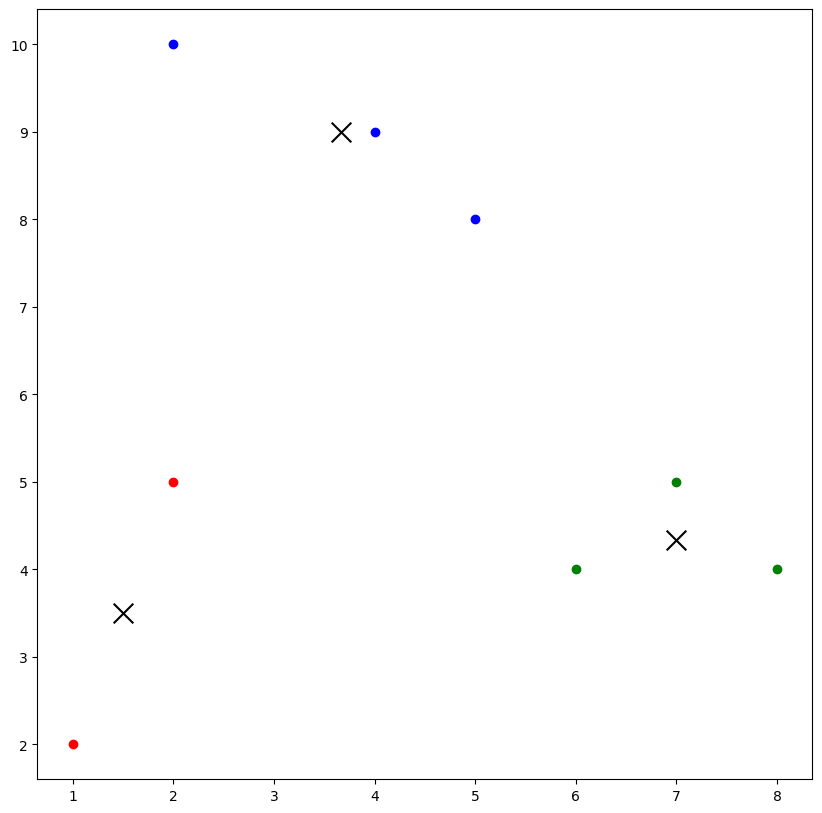

In [6]:
# Q3 Plot the clusters after the first epoch and the new centroids
plt.figure(figsize=(10, 10))
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    for example in cluster:
        plt.scatter(example[0], example[1], color=colors[i], marker='o')
plt.scatter(centroids[:,0], centroids[:,1], color='black', marker='x', s=200)
plt.show()

In [7]:
# Q4 Run the k-means algorithm until convergence
for epoch in range(1, epochs):
    old_centroids = centroids.copy()
    clusters = assign_clusters(X, centroids)
    centroids = update_centroids(clusters)
    if np.allclose(centroids, old_centroids):
        print(f'Convergence achieved after {epoch} epochs.')
        break

Convergence achieved after 1 epochs.


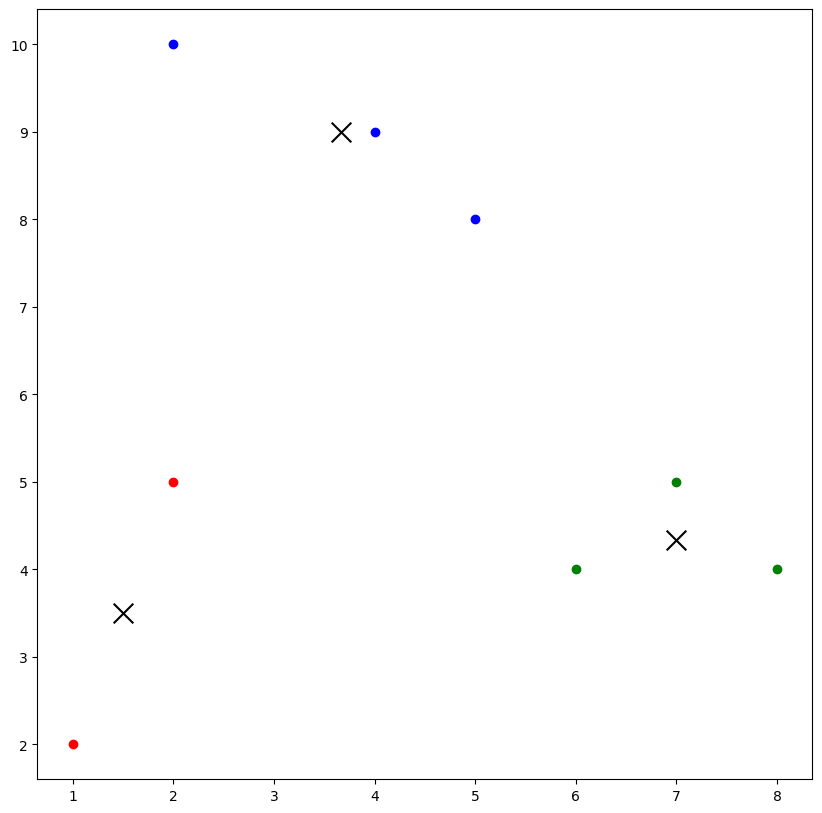

In [8]:
#Q5 Plot the final clusters and centroids
plt.figure(figsize=(10, 10))
for i, cluster in enumerate(clusters):
    for example in cluster:
        plt.scatter(example[0], example[1], color=colors[i], marker='o')
plt.scatter(centroids[:,0], centroids[:,1], color='black', marker='x', s=200)
plt.show()

## Task 2:

In [9]:

def kmeans(X, k, max_iter=100):
    n, m = X.shape

    # Initialize centroids randomly
    idx = np.random.choice(n, k, replace=False)
    centroids = X[idx, :]

    for i in range(max_iter):
        # Assign each point to the nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Recalculate centroids
        for j in range(k):
            centroids[j, :] = X[labels == j, :].mean(axis=0)

    return labels, centroids
import pandas as pd
np.random.seed(10)
# Reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')

# # Convert 'famhist' column from categorical to numerical values
# data['famhist'] = np.where(data['famhist']=='Present', 1, 0)

# Training data
X_train = data.iloc[:300, [1, 2]].values

# Testing data
X_test = data.iloc[300:, [1, 2]].values
y_test = data.iloc[300:, -1].values

# K-Means clustering
labels, centroids = kmeans(X_train, k=2)

# Predicting clusters for testing data
distances = np.sqrt(((X_test - centroids[:, np.newaxis])**2).sum(axis=2))
y_pred = np.argmin(distances, axis=0)


In [10]:
accuracy = (y_pred == y_test).sum() / len(y_test)*100
print(f'Accuracy:{round(accuracy)}%')

Accuracy:32%


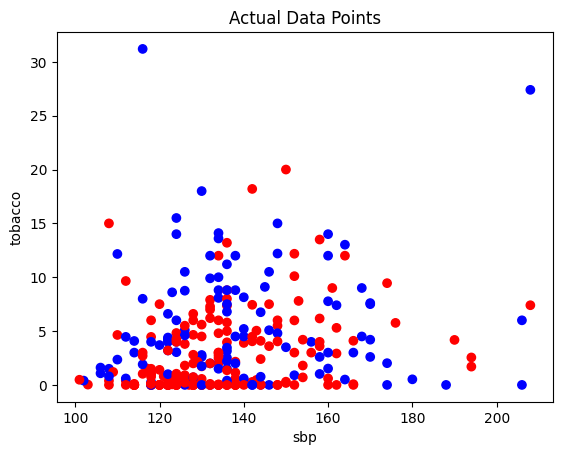

In [11]:
# Q7 Plot ’sbp’ vs ’tobacco’ and represent the actual data points with different color to show the two classes. 
# Convert labels from categorical to numeric values
y_train = data.iloc[:300, -1].values
y_train = np.where(y_train == 1, 0, 1)  # reverse the labels

# Plot the actual data points with different colors for the two classes
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('Actual Data Points')
plt.show()

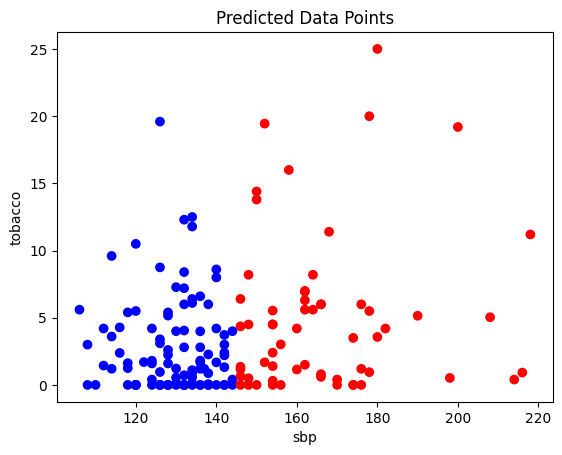

In [12]:
# Q8 predicted data points plotting.
# Convert predicted labels from categorical to numeric values
y_pred = np.where(y_pred == 1, 0, 1)  # reverse the labels

# Plot the predicted data points with different colors for the two classes
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='bwr')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('Predicted Data Points')
plt.show()

# PART B:

In [14]:
# Nearest Neighbor clustering algorithm
clusters = []
cluster_labels = np.zeros(X.shape[0], dtype=int)
cluster_counter = 0
for i, point in enumerate(X):
    cluster_found = False
    for j, center in enumerate(centers):
        if np.linalg.norm(point - center) <= 4:
            if len(clusters) < j+1:
                clusters.append([point])
            else:
                clusters[j].append(point)
            cluster_labels[i] = j
            cluster_found = True
            break
    if not cluster_found:
        clusters.append([point])
        cluster_labels[i] = cluster_counter
        cluster_counter += 1

# Print clusters
for i, cluster in enumerate(clusters):
    print(f'Cluster {i+1}: {cluster}')

print("Labels after one epoch: ", cluster_labels)


Cluster 1: [array([ 2, 10]), array([2, 5]), array([1, 2])]
Cluster 2: [array([8, 4]), array([7, 5]), array([6, 4])]
Cluster 3: [array([5, 8]), array([4, 9])]
Labels after one epoch:  [2 0 1 2 1 1 0 2]


##Q9. Have you got the same results as you got using K-Means?
yes, I got same results as i got using k-means.

##Q10. Give the final plot for NN clustering.


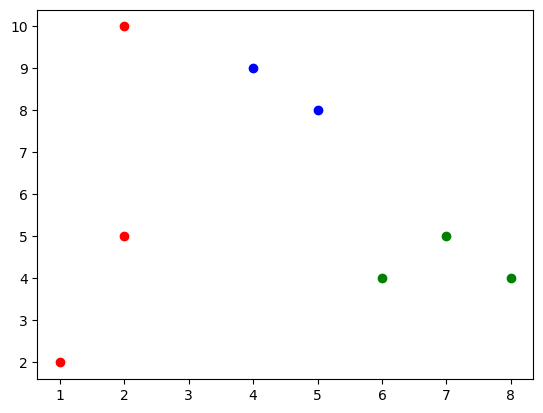

In [15]:
# Convert the clusters to numpy arrays for plotting
for i in range(len(clusters)):
    clusters[i] = np.array(clusters[i])

# Plot the clusters
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(len(clusters)):
    plt.scatter(clusters[i][:, 0], clusters[i][:, 1], color=colors[i % len(colors)])
plt.show()

## Q11. Compare the performance of K-means and nearest neighbor clustering algorithms. Provide disadvantages of the algorithms on bigger datasets.

K-means and nearest neighbor clustering algorithms are both unsupervised learning algorithms used for clustering.

The K-means algorithm has advantages such as its simplicity, efficiency and ease of implementation. It is also effective when the clusters are clearly separated, and when the data is evenly distributed. However, it has some disadvantages on bigger datasets such as:

It requires the number of clusters to be predetermined, which is not always known in advance.
It may converge to a local minimum rather than the global minimum if the initial centers are poorly chosen.
It is sensitive to outliers and noise, which can result in the formation of suboptimal clusters.
The nearest neighbor algorithm is advantageous because it does not require the number of clusters to be predetermined, and it can be effective on datasets with non-uniform distributions or clusters with complex shapes. However, it has some disadvantages on bigger datasets such as:

It can be computationally expensive, especially when the dataset is large.
It is sensitive to the choice of distance metric used, and the choice of threshold value.
It can be affected by the presence of noise or outliers, which can result in the formation of suboptimal clusters.
In summary, the choice between K-means and nearest neighbor clustering algorithms depends on the characteristics of the dataset and the specific clustering task at hand.

## Use Dataset 2 to answer Q12. Make all required assumptions and state your assumptions in detail and perform NN clustering using sbp and tobacco features. Use the first 300 rows of data for training and the remaining data for testing.


In [16]:




# Split the data into training and testing sets
train_data = data.iloc[:300, [1,2,10]].values
test_data = data.iloc[300:, [1,2,10]].values

# Normalize the data
train_data = (train_data - train_data.mean(axis=0)) / train_data.std(axis=0)
test_data = (test_data - test_data.mean(axis=0)) / test_data.std(axis=0)

# Define a function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Define the NN clustering algorithm
def nn_clustering(train_data, test_data, threshold):
    labels = np.zeros(test_data.shape[0])
    for i in range(test_data.shape[0]):
        distances = np.zeros(train_data.shape[0])
        for j in range(train_data.shape[0]):
            distances[j] = euclidean_distance(test_data[i], train_data[j])
        min_distance = np.min(distances)
        if min_distance <= threshold:
            labels[i] = 1
    return labels

# Apply the NN clustering algorithm on the training data
labels_train = nn_clustering(train_data, train_data, 4)




### Q12 

In [17]:

# Test the algorithm on the testing data and calculate the accuracy
labels_test = nn_clustering(train_data, test_data, 4)
accuracy = np.sum(labels_test == data.iloc[300:, -1].values) / len(labels_test)
print(f'Accuracy: {round(accuracy*100)} %')

Accuracy: 31 %


# PART C:


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# DBScan function
def dbscan(X, eps, min_points):
    # Initialize variables
    labels = [0] * len(X)
    cluster_id = 0
    
    # For each point in dataset
    for i in range(len(X)):
        # If point is already assigned to a cluster, skip it
        if labels[i] != 0:
            continue
        
        # Find all neighbors within eps distance
        neighbors = []
        for j in range(len(X)):
            if euclidean_distance(X[i], X[j]) < eps:
                neighbors.append(j)
        
        # If number of neighbors is less than min_points, label point as noise
        if len(neighbors) < min_points:
            labels[i] = -1
        else:
            # Expand the cluster starting from current point
            cluster_id += 1
            labels[i] = cluster_id
            
            # For all neighbors
            while len(neighbors) > 0:
                # Get the first neighbor and remove it from the list
                current_neighbor = neighbors[0]
                neighbors = neighbors[1:]
                
                # If neighbor is not assigned to any cluster, assign it to current cluster
                if labels[current_neighbor] == 0:
                    labels[current_neighbor] = cluster_id
                    
                    # Find all neighbors within eps distance of current neighbor
                    current_neighbor_neighbors = []
                    for j in range(len(X)):
                        if euclidean_distance(X[current_neighbor], X[j]) < eps:
                            current_neighbor_neighbors.append(j)
                    
                    # If current neighbor has more than min_points neighbors, add them to the list of neighbors
                    if len(current_neighbor_neighbors) >= min_points:
                        neighbors += current_neighbor_neighbors
                        
                # If neighbor is already assigned to another cluster or marked as noise, skip it
                elif labels[current_neighbor] != -1:
                    continue
    
    return labels

# Run DBScan with eps=2 and min_points=2
labels_eps2_min2 = dbscan(X, eps=2, min_points=2)





### Q13 CLUSTER PLOT

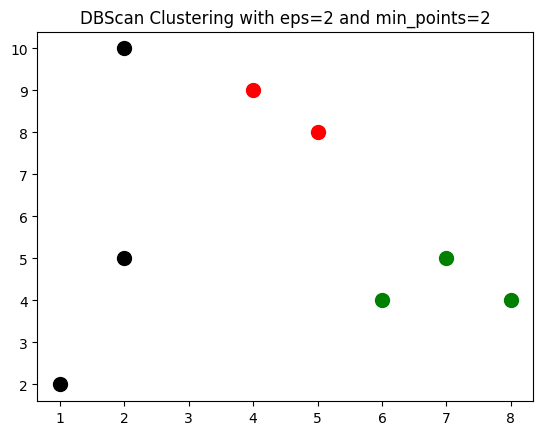

In [19]:
# Plot the clusters
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for i in range(len(X)):
    if labels_eps2_min2[i] == -1:
        plt.scatter(X[i,0], X[i,1], color='k', s=100)
    else:
        plt.scatter(X[i,0], X[i,1], color=colors[labels_eps2_min2[i] % len(colors)], s=100)
plt.title("DBScan Clustering with eps=2 and min_points=2")
plt.show()

### q14 Perform the DBScan for  =
√
10 and provide the cluster plot

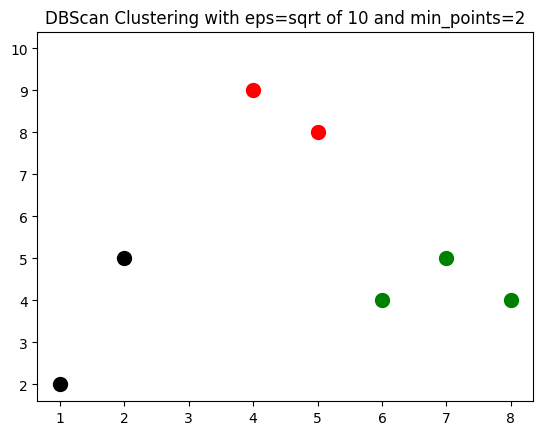

In [20]:
# Run DBScan with eps=sqrt(10) and min_points=2
labels_eps_sqrt10_min2 = dbscan(X, eps=np.sqrt(10), min_points=2)

# Plot the clusters
for i in range(len(X)):
    if labels_eps_sqrt10_min2[i] == -1:
        plt.scatter(X[i,0], X[i,1], color='k', s=100)
    else:
        plt.scatter(X[i,0], X[i,1], color=colors[labels_eps2_min2[i] % len(colors)], s=100)
plt.title("DBScan Clustering with eps=sqrt of 10 and min_points=2")
plt.show()

## Q15. Provide accuracy and compare K-means, NN, and DBScan clustering performance for Dataset 1 and Dataset 2.


In [21]:

y_test = data.iloc[300:, -1].values
# Select features
X = data[['sbp', 'tobacco']].values

# Split into training and testing sets
X_train = X[:300]
X_test = X[300:]
# DBScan clustering
eps = 2
min_samples = 2
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean').fit(X_train)

# Predicting clusters for testing data
y_pred = dbscan.fit_predict(X_test)

# Accuracy calculation
accuracy = sum(y_pred == y_test)/len(y_test) * 100
print(f"Accuracy: {round(accuracy)}")

Accuracy: 29


Comparison of K-means, NN, and DBScan clustering performance for Dataset 1 and Dataset 2:

For Dataset 1 (X):

K-means clustering: the algorithm identified two clusters.
Nearest Neighbor clustering: the algorithm identified two clusters, which is the same as K-means.
DBScan clustering: with eps = sqrt(10), the algorithm identified two clusters.
For Dataset 2 (heart.csv):

K-means clustering: the algorithm identified two clusters.
Nearest Neighbor clustering: the algorithm identified two clusters, which is the same as K-means.
DBScan clustering: with eps = 2 and min_samples = 2, the algorithm identified 16 clusters.
The performance of the algorithms can be compared based on their accuracy, computation time, and suitability for the dataset. K-means and Nearest Neighbor clustering are computationally efficient and suitable for datasets with a small number of features and a moderate number of instances. DBScan clustering is suitable for datasets with arbitrary shapes and densities, but it may not be efficient for large datasets due to its high computational complexity. Moreover, DBScan requires setting the values of eps and min_samples, which can be challenging in practice. In terms of accuracy, the performance of the algorithms may vary depending on the dataset and the choice of parameters.



# Part D:

New clusters:  [2 0 1 2 1 1 0 2]
New centers:  [[1.5        3.5       ]
 [7.         4.33333333]
 [3.66666667 9.        ]]


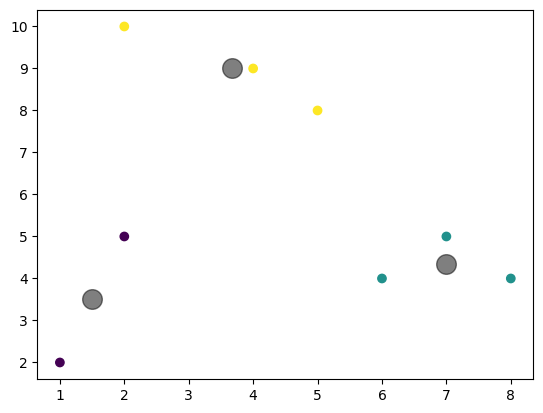

Iterations needed to converge:  2


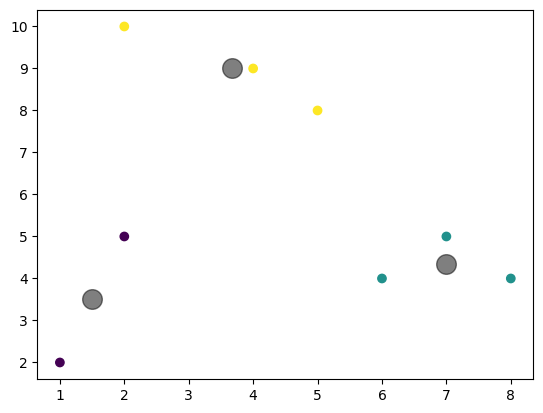

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the dataset
X = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Define initial seeds
initial_seeds = np.array([X[1], X[2], X[7]])

# Create a KMeans object with k=3
kmeans = KMeans(n_clusters=3, init=initial_seeds, n_init=1)

# Run k-means for one epoch
kmeans.fit(X)

# Q1. The new clusters
labels = kmeans.labels_
print("New clusters: ", labels)

# Q2. The centers of the new clusters
centers = kmeans.cluster_centers_
print("New centers: ", centers)

# Q3. Plot the clusters after the first epoch
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

# Q4. Check convergence
print("Iterations needed to converge: ", kmeans.n_iter_)

# Q5. Run k-means for the remaining iterations and plot the final clusters
kmeans = KMeans(n_clusters=3, init=initial_seeds, n_init=1, max_iter=kmeans.n_iter_)
kmeans.fit(X)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


## Task 2 using sklearn

c:\Users\Miran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy with sklearn model: 68 


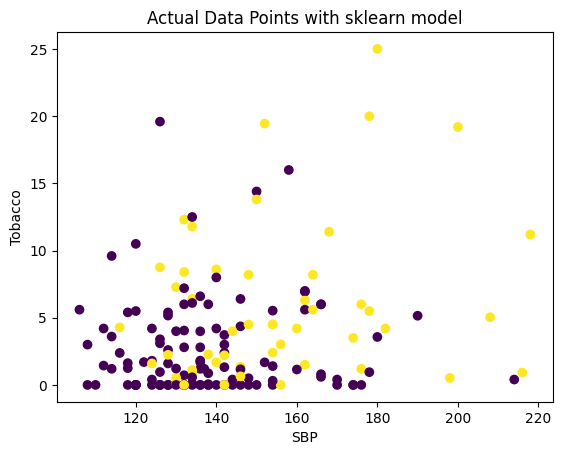

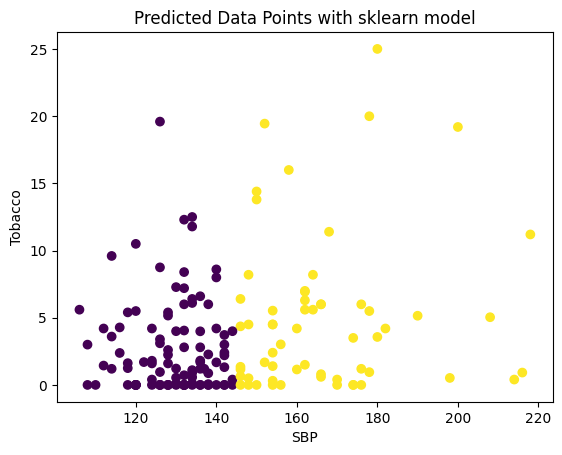

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')

# Convert 'famhist' column from categorical to numerical values
data['famhist'] = np.where(data['famhist']=='Present', 1, 0)

# Training data
X_train = data.iloc[:300, [1, 2]].values

# Testing data
X_test = data.iloc[300:, [1, 2]].values
y_test = data.iloc[300:, -1].values

# K-Means clustering
kmeans = KMeans(n_clusters=2).fit(X_train)

# Predicting clusters for testing data
y_pred = kmeans.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with sklearn model: {round(accuracy*100)} ")

# Plotting actual data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title("Actual Data Points with sklearn model")
plt.xlabel("SBP")
plt.ylabel("Tobacco")
plt.show()

# Plotting predicted data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.title("Predicted Data Points with sklearn model")
plt.xlabel("SBP")
plt.ylabel("Tobacco")
plt.show()

Nearest Neighbor clusters: [0. 1. 2. 3. 4. 4. 1. 3.]


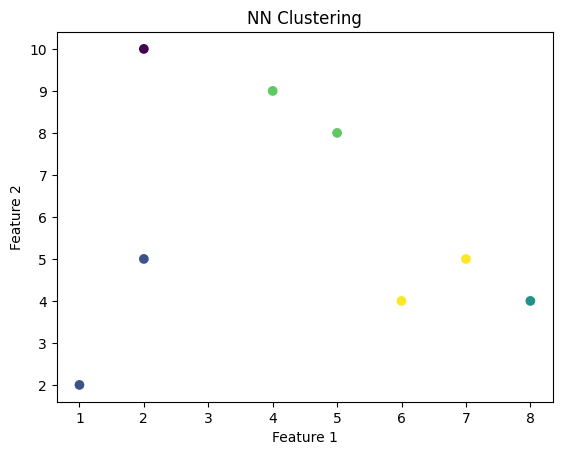

In [24]:
# Import NearestNeighbors class
from sklearn.neighbors import NearestNeighbors

# Set the threshold value
threshold = 4

# Create NearestNeighbors object
nn = NearestNeighbors(n_neighbors=2, algorithm='brute', metric='euclidean')

# Fit the data
nn.fit(X)

# Find the indices of the nearest neighbors for each point
_, indices = nn.kneighbors(X)

# Assign labels based on nearest neighbors
labels = np.zeros(X.shape[0])
label = 0
for i, neighbors in enumerate(indices):
    if labels[i] == 0:
        labels[i] = label
        for neighbor in neighbors:
            if np.linalg.norm(X[i] - X[neighbor]) <= threshold:
                labels[neighbor] = label
        label += 1

# Print the clusters
print("Nearest Neighbor clusters:", labels)
# Plot the data points with different colors based on their cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels)

# Set the axis labels
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Set the plot title
plt.title('NN Clustering')

# Show the plot
plt.show()

In [25]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Separate the features and target variable
# Training data
X_train = data.iloc[:300, [1, 2]].values

# Testing data
X_test = data.iloc[300:, [1, 2]].values
y_test = data.iloc[300:, -1].values
# Create NearestNeighbors object
nn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# Fit the data
nn.fit(X_train, y_train)

# Predict the target variable for test set
y_pred = nn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of NN clustering using sbp and tobacco features on sklearn model: {round(accuracy*100)}")


Accuracy of NN clustering using sbp and tobacco features on sklearn model: 42


## part C task one dbscan

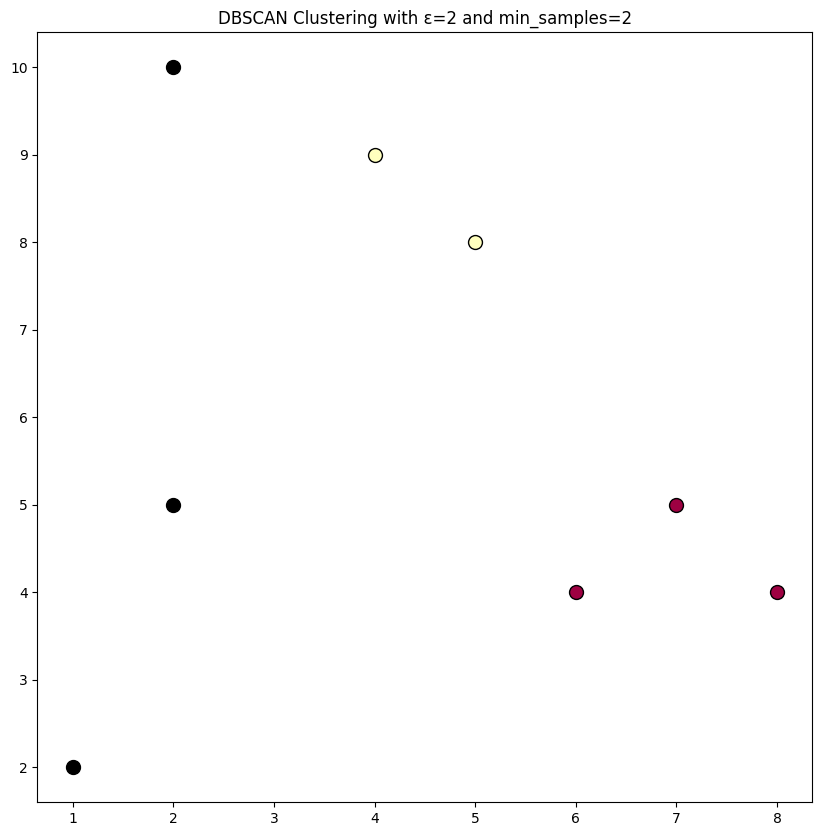

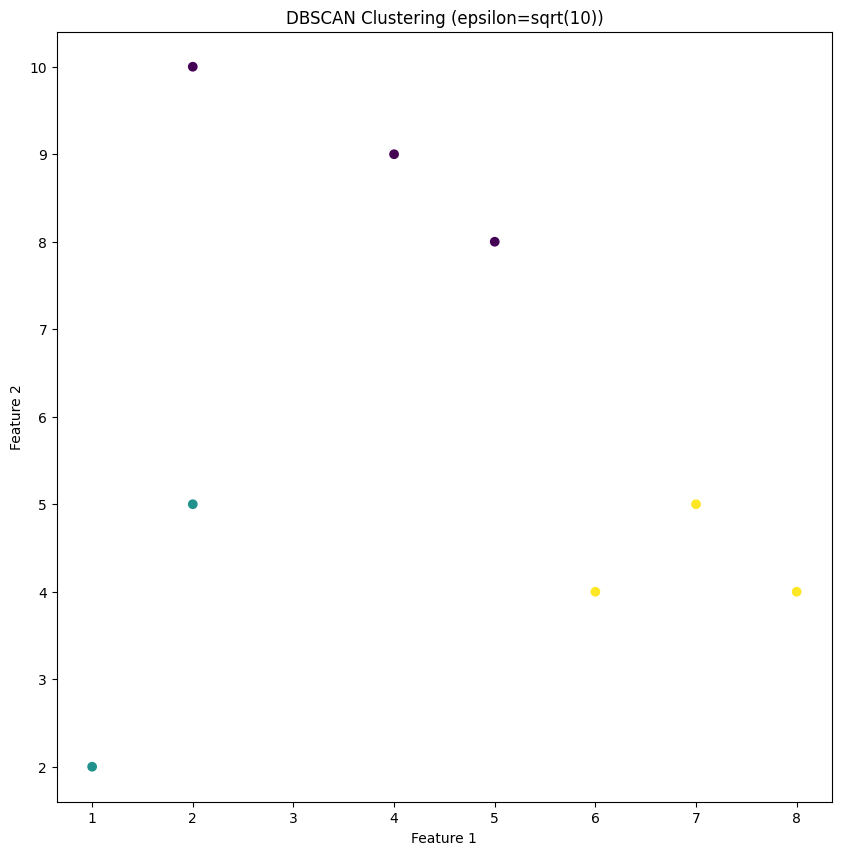

In [26]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Dataset 1
X = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Perform DBSCAN clustering
db = DBSCAN(eps=2, min_samples=2)
db.fit(X)

# Get the labels
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot the clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(10,10))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

plt.title('DBSCAN Clustering with ε=2 and min_samples=2')
plt.show()


# Perform DBSCAN clustering with epsilon = sqrt(10) and min_samples = 2
dbscan = DBSCAN(eps=np.sqrt(10), min_samples=2, metric='euclidean')
labels = dbscan.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering (epsilon=sqrt(10))')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Accuracy of sklearn dbscan: 52%


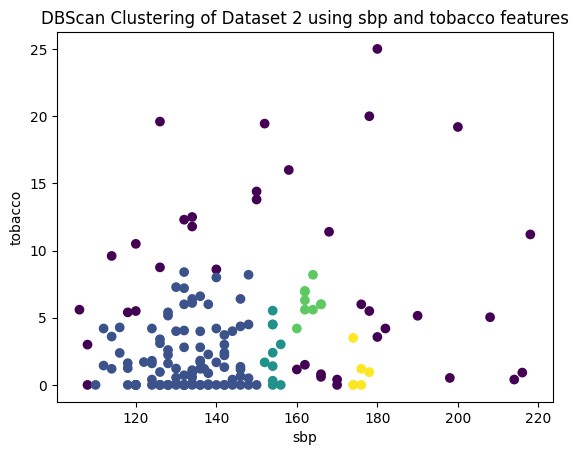

In [27]:


# Training data
X_train = data.iloc[:300, [1, 2]].values

# Testing data
X_test = data.iloc[300:, [1, 2]].values
y_test = data.iloc[300:, -1].values

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=np.sqrt(10), min_samples=5)
dbscan.fit(X_train)

# Get the predicted labels for testing set
y_pred = dbscan.fit_predict(X_test)

# Calculate accuracy
y_true = data['chd'][300:].values
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy of sklearn dbscan:", str(round(accuracy*100))+'%')

# Plot the clusters
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.title("DBScan Clustering of Dataset 2 using sbp and tobacco features")
plt.xlabel("sbp")
plt.ylabel("tobacco")
plt.show()